In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, classification_report


In [19]:
df=pd.read_csv('customer_data.csv')
df.head(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [20]:
df=df.drop(columns='loyalty_status')
df=df.drop(columns='id')


In [21]:
df.head(5)

,age,gender,income,education,region,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,Male,40682,Bachelor,East,frequent,18249,Books,0,6
1,29,Male,15317,Masters,West,rare,4557,Clothing,1,6
2,37,Male,38849,Bachelor,West,rare,11822,Clothing,0,6
3,30,Male,11568,HighSchool,South,frequent,4098,Food,0,7
4,31,Female,46952,College,North,occasional,19685,Clothing,1,5


In [22]:
#Label Encoding four categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['education'] = le.fit_transform(df['education'])
df['region'] = le.fit_transform(df['region'])
df['gender'] = le.fit_transform(df['gender'])
df['product_category'] = le.fit_transform(df['product_category'])
df['purchase_frequency'] = le.fit_transform(df['purchase_frequency'])
df.head()

,age,gender,income,education,region,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,1,40682,0,0,0,18249,1,0,6
1,29,1,15317,3,3,2,4557,2,1,6
2,37,1,38849,0,3,2,11822,2,0,6
3,30,1,11568,2,2,0,4098,4,0,7
4,31,0,46952,1,1,1,19685,2,1,5


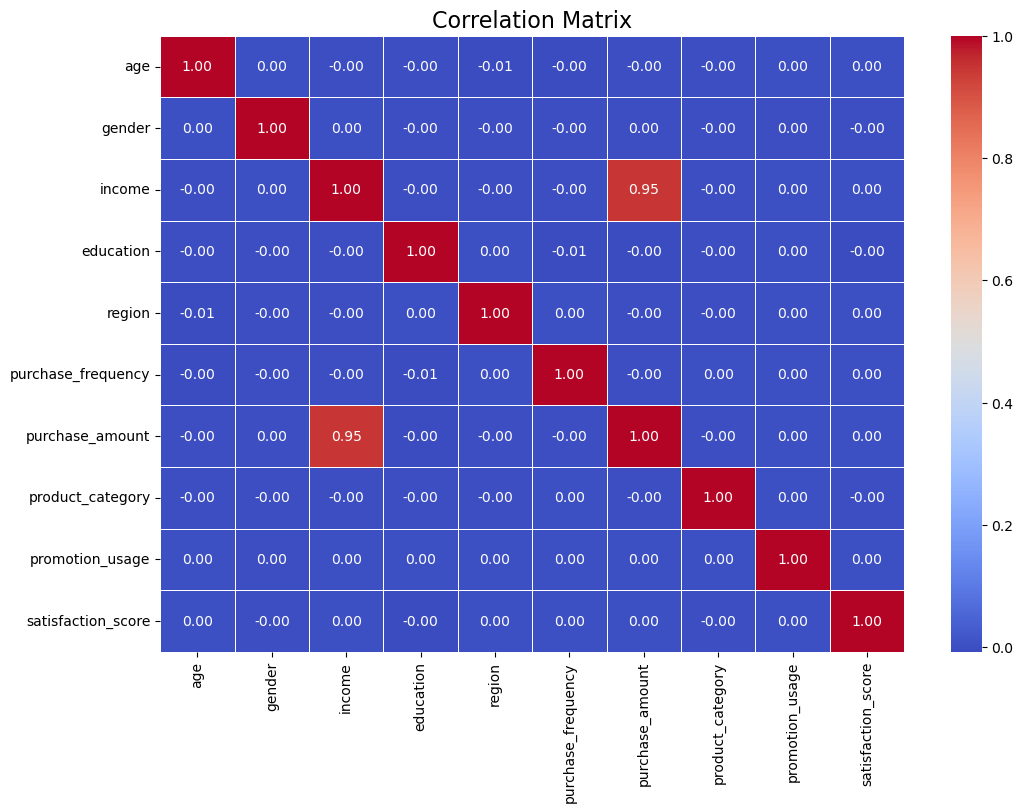

In [23]:
numeric_data = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix with values
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()